In [28]:
""" Importar las librerias """
#Libreria matematica
import numpy as np

#Libreria panda manipular datos, leer archivos
import pandas as pd
# Libreria para graficar
import matplotlib.pyplot as plt

### Librerias para el RL
import seaborn as sb
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

#Librerias de aprendizaje automatico
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
#Setear valores para la gráfica.
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [2]:
#Leer los datos del archivo

dataframe = pd.read_csv('articulos_ml.csv')
dataframe

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


In [4]:
# Obtener la cantidad de columnas y filas

dataframe.shape

#Estadistica básica de los datos.
dataframe.describe()

#1808 La cantidad media de palabras que hay en los articulos
#250 es el min, y #8401 es el max

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


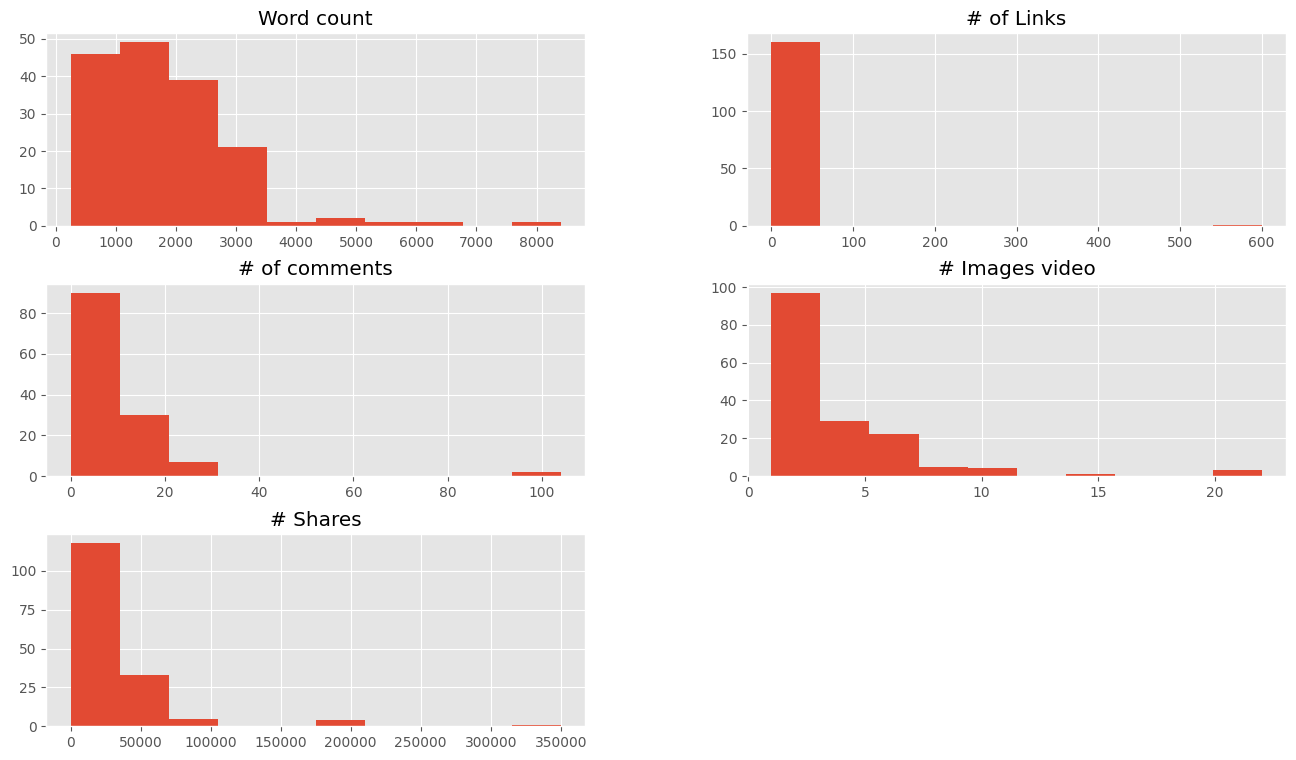

In [11]:
#Analisis de los datos, de acuerdo con la cantidad de palabras que tiene el articulo vs las veces que el articulo es compartido

dataframe.drop(['Title', 'url', 'Elapsed days'], axis=1).hist()
plt.show()

##Graficar la tendencia de los puntos

  - nro de Palabras  y nro de shares
  - Dividir que los datos se vean de dos colores de acuerdo a la media.


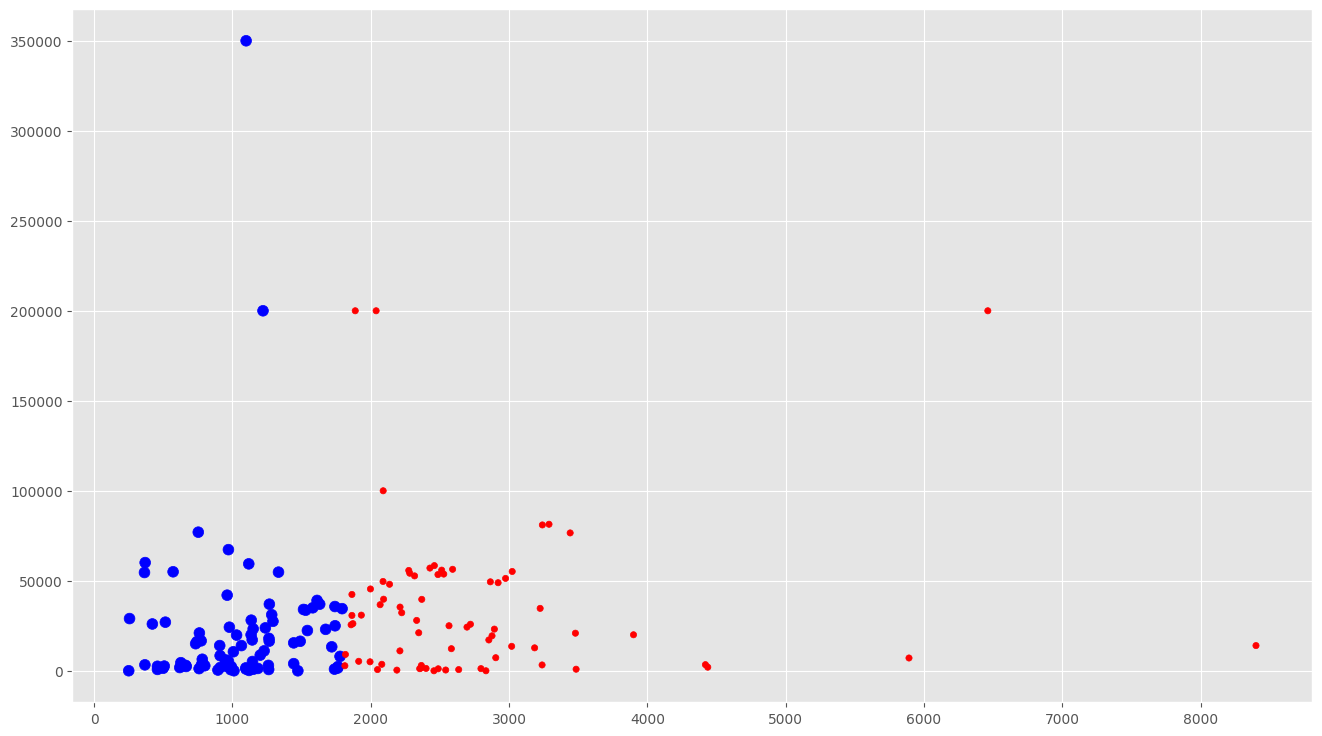

In [17]:
#Colores para los puntos
colores = ['red', 'blue']

f1 = dataframe['Word count'].values #Cantidad de palabras
f2 = dataframe['# Shares'].values
tamano = [20, 60]

asignarColor = []
asignarTamano = []

for index, row in dataframe.iterrows():
    if(row['Word count']>1808):
        asignarColor.append(colores[0])
        asignarTamano.append(tamano[0])
    else:
        asignarColor.append(colores[1])
        asignarTamano.append(tamano[1])
        
#Graficar
plt.scatter(f1,f2, c=asignarColor, s=asignarTamano)
plt.show()

## Como se observan datos atipicos, se dismunira la cantidad de datos a utilizar.

- Eje X: 0 al 3500
- Eje Y: 0 al 80000

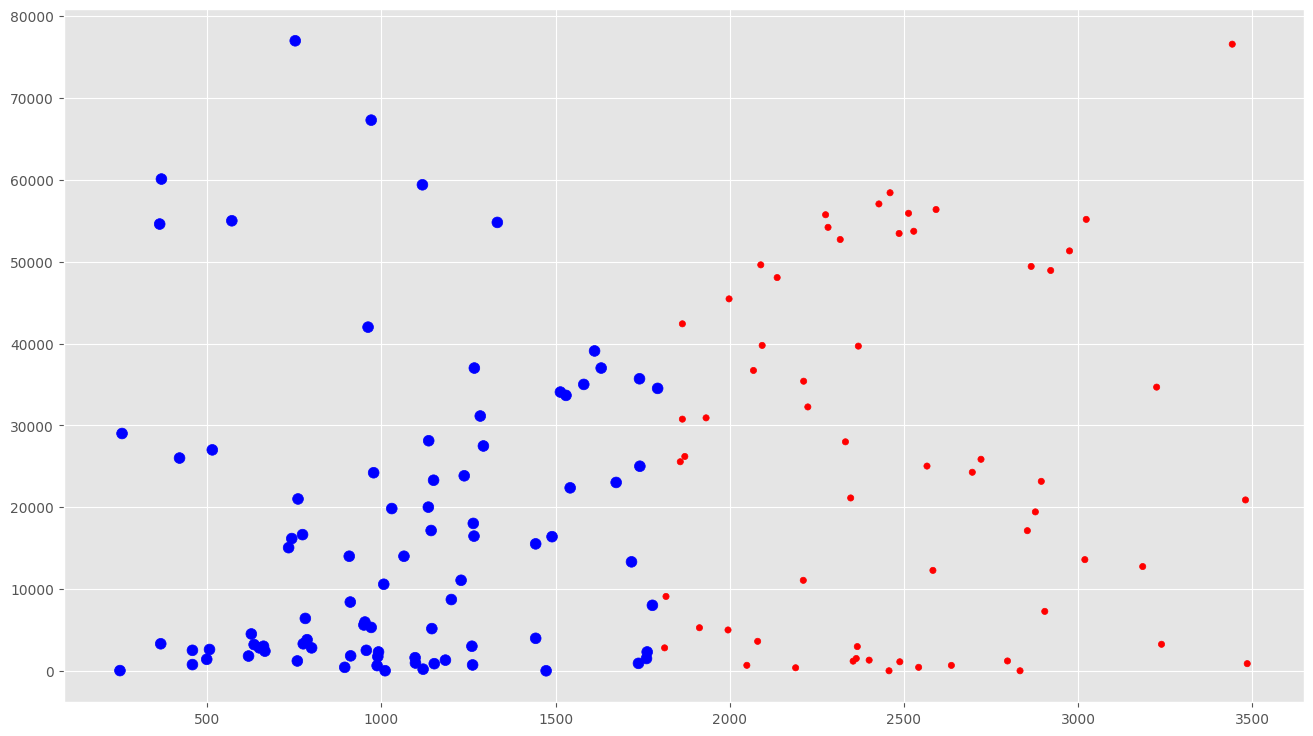

In [20]:
dataframe_filtro = dataframe[(dataframe['Word count']<= 3500) & (dataframe['# Shares']<= 80000)]

colores = ['red', 'blue']

f1 = dataframe_filtro['Word count'].values #Cantidad de palabras
f2 = dataframe_filtro['# Shares'].values
tamano = [20, 60]

asignarColor = []
asignarTamano = []

for index, row in dataframe_filtro.iterrows():
    if(row['Word count']>1808):
        asignarColor.append(colores[0])
        asignarTamano.append(tamano[0])
    else:
        asignarColor.append(colores[1])
        asignarTamano.append(tamano[1])
        
#Graficar
plt.scatter(f1,f2, c=asignarColor, s=asignarTamano)
plt.show()



## Regresión lineal (1 Variable)

In [34]:
dataX = dataframe_filtro[['Word count']]

x_train = np.array(dataX)
y_train = dataframe_filtro['# Shares'].values


# Crear el objeto de regresion lineal
regr = linear_model.LinearRegression()

#Entrenar el modelo
regr.fit(x_train, y_train)

#prediccion el modelos (test)
y_pred = regr.predict(x_train)

#Evaluar el modelo

print('Coeficiente: \n', regr.coef_)
print('Corte con el eje Y: \n', regr.intercept_)
print('Error cuadrado medio:\n %.2f ' % mean_squared_error(y_train, y_pred))
print('Puntaje de varianza:\n %.2f ' % r2_score(y_train, y_pred))



Coeficiente: 
 [5.69765366]
Corte con el eje Y: 
 11200.30322307416
Error cuadrado medio:
 372888728.34 
Puntaje de varianza:
 0.06 


In [ ]:
plt.scatter(x_train[:,0], y_train, c=asignarColor, s=asignarTamano)
plt.plot(x_train[:,0], y_pred, color = 'g', linewidth=5)